In [43]:
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import scikit_posthocs as sp

In [5]:
df = pd.read_csv("MoleculeACE_results.csv")

In [6]:
df['method'] = df.algorithm+"_"+df.descriptor

In [7]:
df

,dataset,algorithm,descriptor,augmentation,rmse,cliff_rmse,method
0,CHEMBL1862_Ki,AFP,GRAPH,0,0.901053,0.797996,AFP_GRAPH
1,CHEMBL1871_Ki,AFP,GRAPH,0,0.856904,0.836467,AFP_GRAPH
2,CHEMBL2034_Ki,AFP,GRAPH,0,0.893187,0.948683,AFP_GRAPH
3,CHEMBL204_Ki,AFP,GRAPH,0,1.179149,1.325082,AFP_GRAPH
4,CHEMBL2047_EC50,AFP,GRAPH,0,0.840231,0.823298,AFP_GRAPH
...,...,...,...,...,...,...,...
715,CHEMBL3979_EC50,Transformer,TOKENS,10,0.844646,0.857748,Transformer_TOKENS
716,CHEMBL4005_Ki,Transformer,TOKENS,10,0.743998,0.844105,Transformer_TOKENS
717,CHEMBL4203_Ki,Transformer,TOKENS,10,1.011184,1.250538,Transformer_TOKENS
718,CHEMBL4616_EC50,Transformer,TOKENS,10,0.777127,0.790613,Transformer_TOKENS


In [8]:
res = []
for k,v in df.groupby('method'):
    res.append([k,v.rmse.median()])
res_df = pd.DataFrame(res,columns=["Method","Median"])
method_order = res_df.sort_values("Median",ascending=True).Method.values

<AxesSubplot:xlabel='rmse', ylabel='method'>

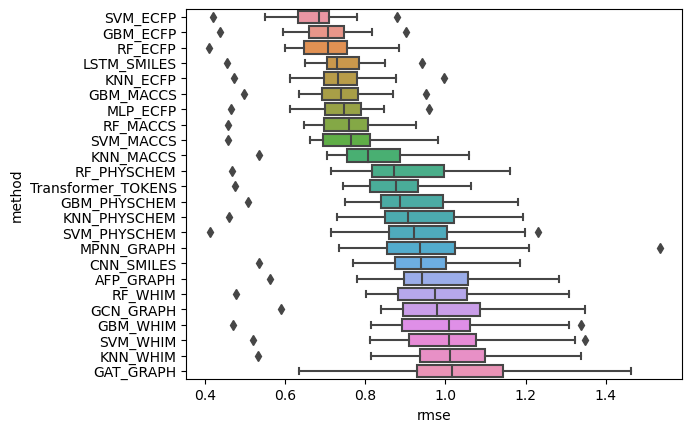

In [9]:
sns.boxplot(y="method",x="rmse",data=df,orient='h',order=method_order)

(0.0, 1.0)

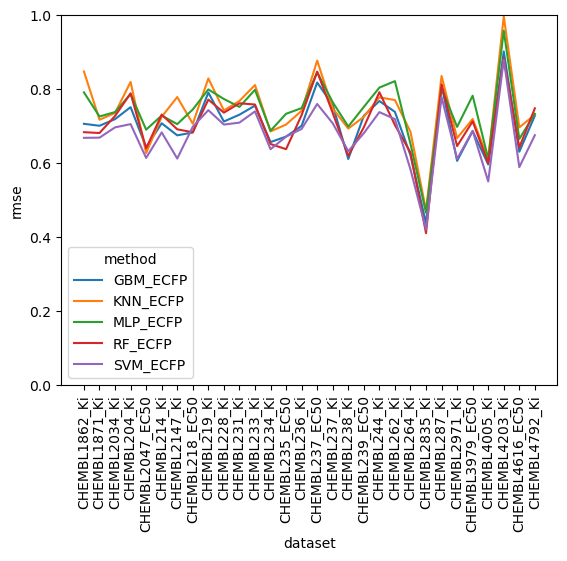

In [12]:
method_list = [x for x in df.method.unique() if x.find("ECFP") >= 0]
ax = sns.lineplot(x="dataset",y="rmse",hue="method",data=df.query("method in @method_list"))
ax.tick_params(axis='x', rotation=90)
ax.set_ylim([0,1])

(0.0, 1.5)

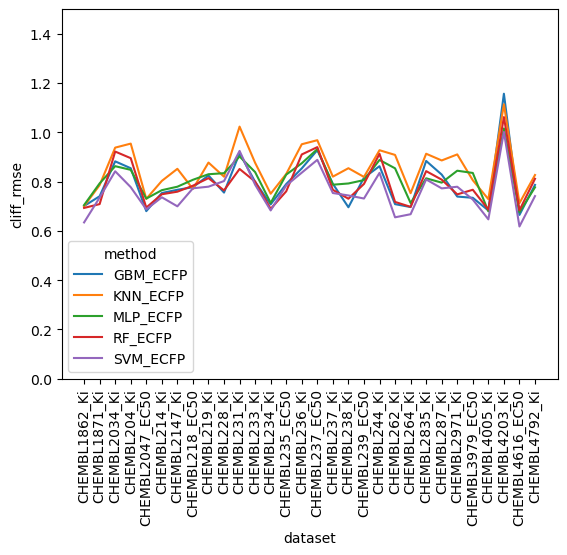

In [18]:
method_list = [x for x in df.method.unique() if x.find("ECFP") >= 0]
ax = sns.lineplot(x="dataset",y="cliff_rmse",hue="method",data=df.query("method in @method_list"))
ax.tick_params(axis='x', rotation=90)
ax.set_ylim([0,1.5])

(0.0, 1.5)

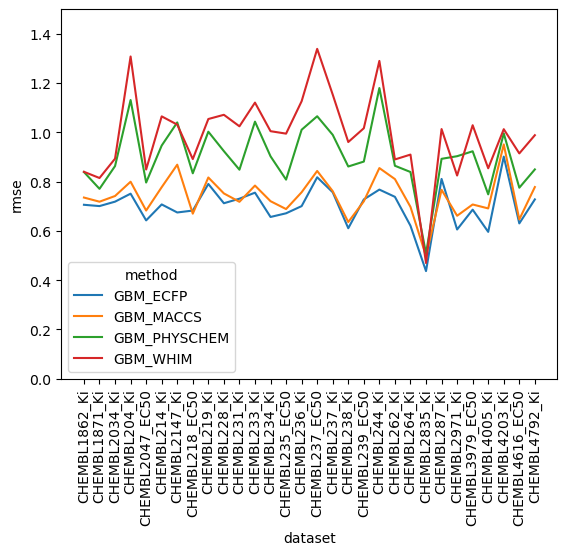

In [16]:
method_list = [x for x in df.method.unique() if x.find("GBM") >= 0]
ax = sns.lineplot(x="dataset",y="rmse",hue="method",data=df.query("method in @method_list"))
ax.tick_params(axis='x', rotation=90)
ax.set_ylim([0,1.5])

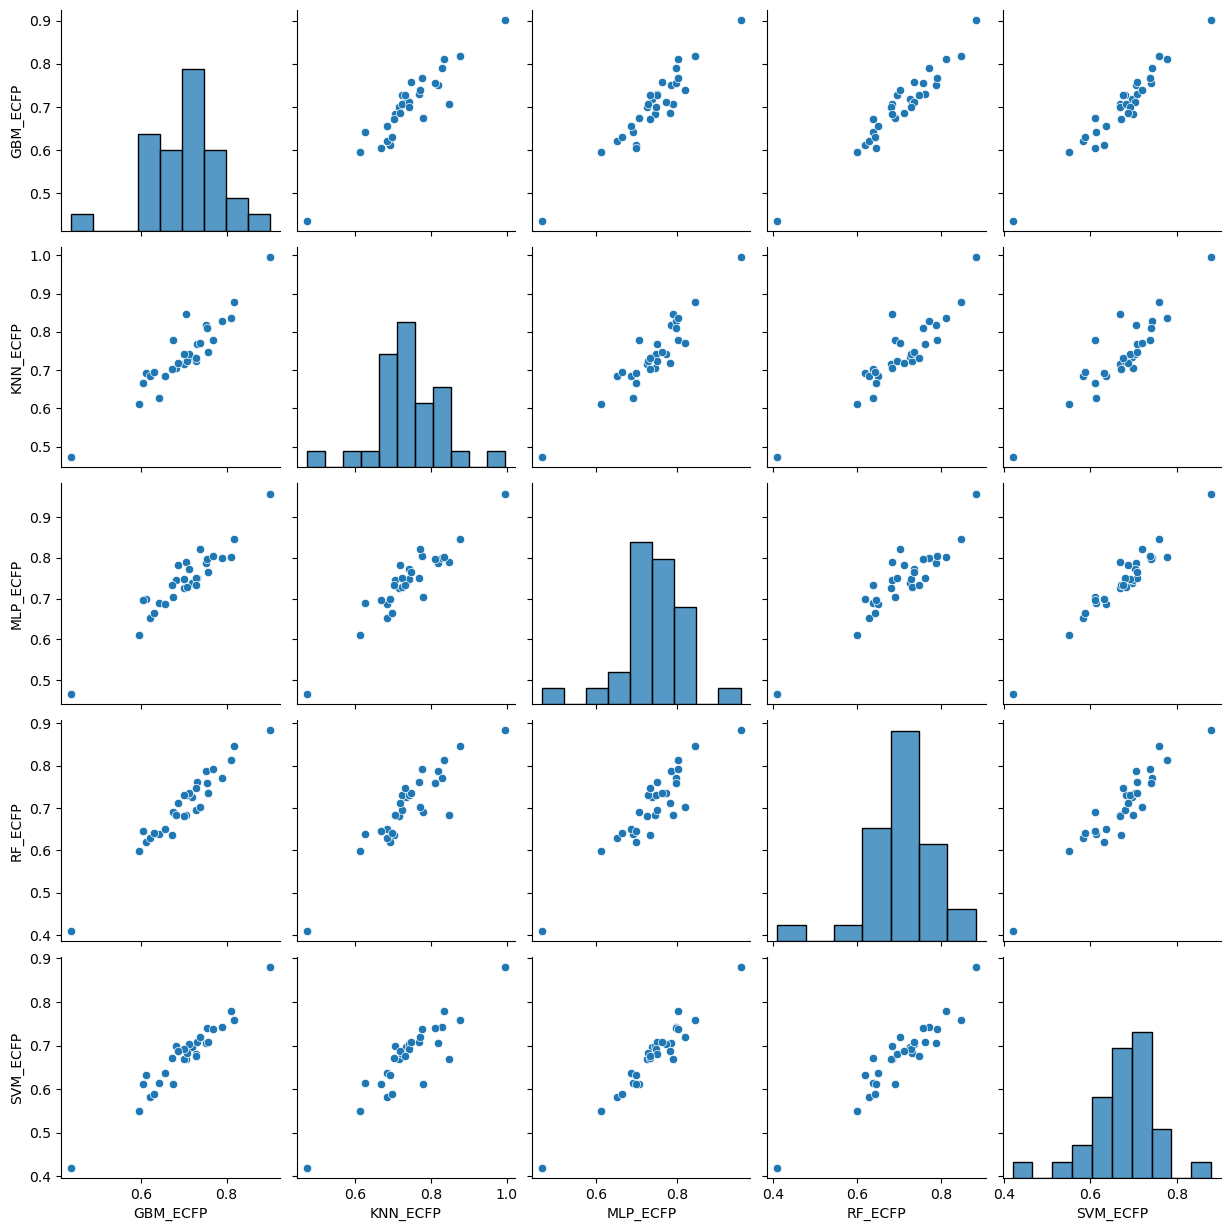

In [31]:
pivot_df = df[['dataset','method','rmse']].pivot(index="dataset",columns="method")['rmse'].reset_index()
cols = pivot_df.columns
sns.pairplot(pivot_df[[x for x in cols if x.find("ECFP") >= 0]])

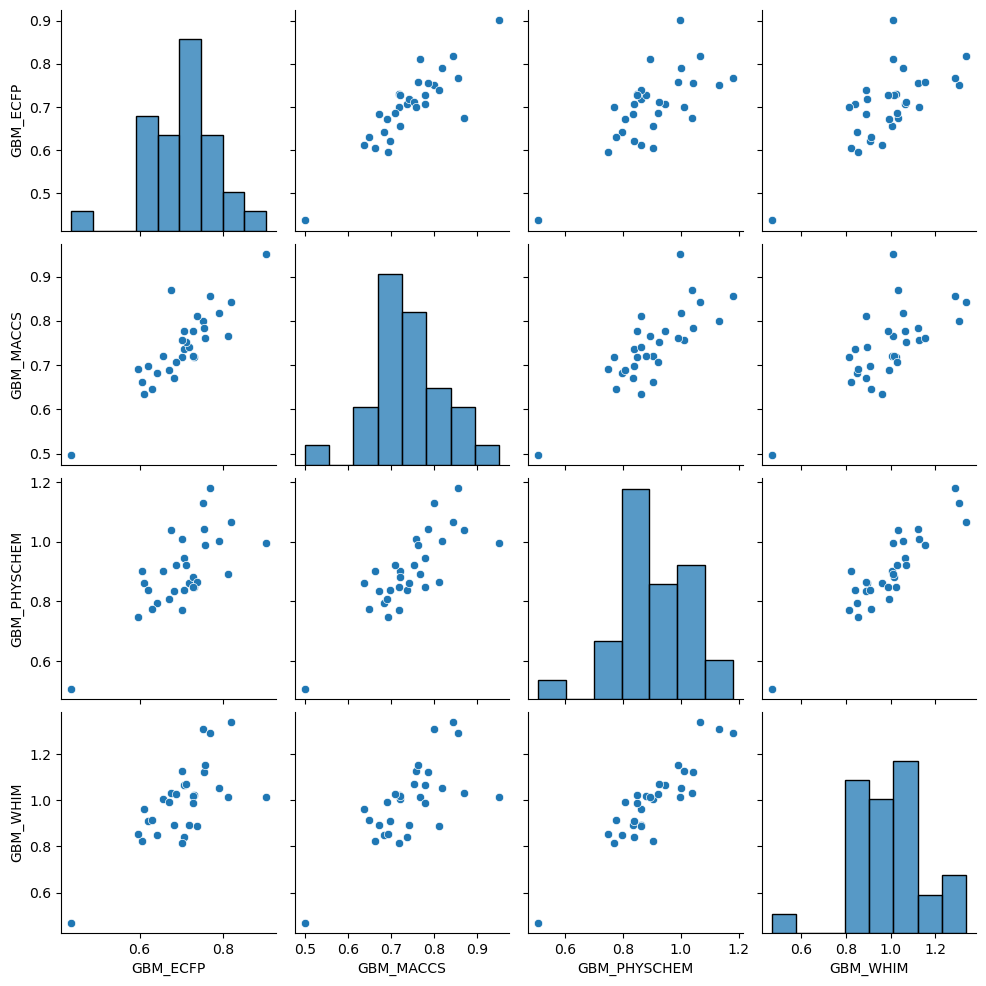

In [32]:
pivot_df = df[['dataset','method','rmse']].pivot(index="dataset",columns="method")['rmse'].reset_index()
cols = pivot_df.columns
sns.pairplot(pivot_df[[x for x in cols if x.find("GBM") >= 0]])

In [51]:
v = pivot_df[[x for x in cols if x.find("ECFP") >= 0]].values
v

array([[0.70592915, 0.84737607, 0.79092907, 0.68325672, 0.66797679],
       [0.70065114, 0.71695567, 0.72578199, 0.6810634 , 0.66845378],
       [0.71861222, 0.73523959, 0.73772006, 0.72707918, 0.69629851],
       [0.64255724, 0.62681162, 0.69009442, 0.63932329, 0.61357377],
       [0.75101481, 0.81923911, 0.78647599, 0.78845353, 0.70508689],
       [0.67471361, 0.77833961, 0.70502868, 0.69097374, 0.61194086],
       [0.70737272, 0.72499016, 0.72820795, 0.73095411, 0.68268759],
       [0.68247286, 0.70617286, 0.74477153, 0.68312361, 0.69796283],
       [0.79042929, 0.82868311, 0.79899229, 0.77145864, 0.74287292],
       [0.71216878, 0.74209438, 0.77311568, 0.73610428, 0.70383482],
       [0.73061649, 0.76781539, 0.75168187, 0.76142414, 0.70915004],
       [0.75509001, 0.81083575, 0.79792272, 0.75815748, 0.7396046 ],
       [0.65648641, 0.68536876, 0.68714255, 0.65118276, 0.63719381],
       [0.67138937, 0.7039273 , 0.73305523, 0.63732817, 0.67128662],
       [0.7005225 , 0.7412149 , 0.

In [52]:
ss.friedmanchisquare(*v.T)

FriedmanchisquareResult(statistic=78.5866666666667, pvalue=3.470206783145217e-16)

In [53]:
sp.posthoc_nemenyi_friedman(v)

,0,1,2,3,4
0,1.00000,0.001000,0.001000,0.802950,0.068160
1,0.00100,1.000000,0.900000,0.005471,0.001000
2,0.00100,0.900000,1.000000,0.001624,0.001000
3,0.80295,0.005471,0.001624,1.000000,0.002222
4,0.06816,0.001000,0.001000,0.002222,1.000000


In [50]:
sp.posthoc_conover(v, p_adjust='holm')

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
1,1.000000,1.000000,1.000000,3.034198e-02,1.000000e+00,1.000000,1.000000,1.000000,1.000000e+00,1.000000,...,1.000000e+00,1.188928e-02,1.572301e-05,1.624993e-01,3.550377e-02,1.000000,1.951672e-04,3.738513e-03,3.550377e-02,1.000000
2,1.000000,1.000000,1.000000,1.000000e+00,6.091750e-02,1.000000,1.000000,1.000000,3.346054e-03,1.000000,...,1.000000e+00,1.000000e+00,2.347802e-02,2.068362e-04,1.000000e+00,1.000000,1.559192e-01,1.589869e-06,1.000000e+00,1.000000
3,1.000000,1.000000,1.000000,6.091750e-02,1.000000e+00,1.000000,1.000000,1.000000,6.634681e-01,1.000000,...,1.000000e+00,2.461921e-02,3.934889e-05,8.447960e-02,6.934304e-02,1.000000,4.520349e-04,1.692186e-03,6.934304e-02,1.000000
4,0.030342,1.000000,0.060918,1.000000e+00,6.195450e-06,1.000000,0.297276,1.000000,1.363487e-07,0.005248,...,4.796880e-04,1.000000e+00,1.000000e+00,4.435727e-09,1.000000e+00,0.249088,1.000000e+00,1.632527e-11,1.000000e+00,0.055689
5,1.000000,0.060918,1.000000,6.195450e-06,1.000000e+00,0.058250,1.000000,0.168659,1.000000e+00,1.000000,...,1.000000e+00,1.814029e-06,6.360454e-10,1.000000e+00,7.564041e-06,1.000000,1.156402e-08,1.000000e+00,7.564041e-06,1.000000
6,1.000000,1.000000,1.000000,1.000000e+00,5.824976e-02,1.000000,1.000000,1.000000,3.164967e-03,1.000000,...,1.000000e+00,1.000000e+00,2.461921e-02,1.951672e-04,1.000000e+00,1.000000,1.624993e-01,1.493982e-06,1.000000e+00,1.000000
7,1.000000,1.000000,1.000000,2.972765e-01,1.000000e+00,1.000000,1.000000,1.000000,1.495758e-01,1.000000,...,1.000000e+00,1.365329e-01,3.591832e-04,1.466315e-02,3.392529e-01,1.000000,3.537064e-03,2.068362e-04,3.392529e-01,1.000000
8,1.000000,1.000000,1.000000,1.000000e+00,1.686592e-01,1.000000,1.000000,1.000000,1.127828e-02,1.000000,...,1.000000e+00,1.000000e+00,7.242857e-03,7.728864e-04,1.000000e+00,1.000000,5.568861e-02,7.084060e-06,1.000000e+00,1.000000
9,1.000000,0.003346,0.663468,1.363487e-07,1.000000e+00,0.003165,0.149576,0.011278,1.000000e+00,1.000000,...,1.000000e+00,3.734101e-08,9.505342e-12,1.000000e+00,1.688792e-07,0.175004,1.892786e-10,1.000000e+00,1.688792e-07,0.714985
10,1.000000,1.000000,1.000000,5.248466e-03,1.000000e+00,1.000000,1.000000,1.000000,1.000000e+00,1.000000,...,1.000000e+00,1.890371e-03,1.696115e-06,6.634681e-01,6.179077e-03,1.000000,2.344468e-05,2.238586e-02,6.179077e-03,1.000000


In [59]:
method_list = [x for x in df.method.unique() if x.find("ECFP") >= 0]
mdf = df.query("method in @method_list")
mdf

,dataset,algorithm,descriptor,augmentation,rmse,cliff_rmse,method
90,CHEMBL1862_Ki,GBM,ECFP,0,0.705929,0.700904,GBM_ECFP
91,CHEMBL1871_Ki,GBM,ECFP,0,0.700651,0.740495,GBM_ECFP
92,CHEMBL2034_Ki,GBM,ECFP,0,0.718612,0.882182,GBM_ECFP
93,CHEMBL204_Ki,GBM,ECFP,0,0.751015,0.854290,GBM_ECFP
94,CHEMBL2047_EC50,GBM,ECFP,0,0.642557,0.680099,GBM_ECFP
...,...,...,...,...,...,...,...
595,CHEMBL3979_EC50,SVM,ECFP,0,0.687070,0.727177,SVM_ECFP
596,CHEMBL4005_Ki,SVM,ECFP,0,0.550048,0.646789,SVM_ECFP
597,CHEMBL4203_Ki,SVM,ECFP,0,0.879794,1.001433,SVM_ECFP
598,CHEMBL4616_EC50,SVM,ECFP,0,0.588710,0.617854,SVM_ECFP


(<AxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x7f56c1586100>)

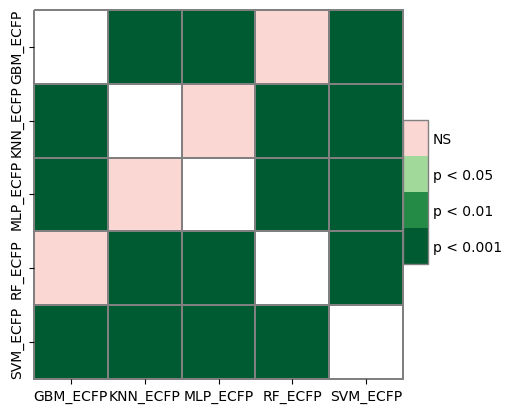

In [63]:
pc = sp.posthoc_durbin(mdf, y_col='rmse', group_col='method',block_col='dataset',melted=True)
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)